# Riyadh Real Estate 

---------

## Introduction

Our goal for this project analyzing Villas for Sale in West Riyadh from 'Aqar' website for a company want to predict the housing prices. by used the web scraping and regression modeling.

## Data Description



**After we obtained the datasets these are the features used:**


- **price:** Villas sale price.
- **area:** Villas space.
- **direction:** Interface of Villas.
- **bedroom:** Number of bedrooms in the Villas.
- **bathroom:** Number of bathrooms in the Villas.
- **living_room:** Number of livingrooms in the Villas.
- **street_width:** Street across from the Villas.
- **house_age:** The age for this Villas.
- **views:** Number of views for this Villas.

------

# Importing libraries and packages

In [1]:
# -- imports Data exploration ,visualization and Models
import csv
import math
import patsy
import pickle
import requests
import time, os
import numpy                        as np
import seaborn                      as sns
import pandas                       as pd
import scipy.stats                  as stats
import statsmodels.api              as sm
import statsmodels.formula.api      as smf
from sqlalchemy                     import create_engine
from bs4                            import BeautifulSoup
from itertools                      import zip_longest
from sklearn                        import metrics
from sklearn                        import preprocessing
from sklearn.linear_model           import LinearRegression,Lasso, Ridge, ElasticNet,LassoCV, RidgeCV
from sklearn.model_selection        import train_test_split, cross_val_score, KFold, GridSearchCV, KFold
from sklearn.preprocessing          import PolynomialFeatures,StandardScaler
from sklearn.pipeline               import make_pipeline
from sklearn.ensemble               import RandomForestRegressor
import matplotlib.pyplot            as plt
%matplotlib inline
sns.set()

* define the lists

In [2]:
pages_url=[]

prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views=[], [], [], [], [], [], [], [], []

# Web scarping Aqar website

In [3]:
for i in range(1,1000):
    url ="https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/%D8%BA%D8%B1%D8%A8-%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/"+str(i)
    response=requests.get(url)
    page=response.text
    soup=BeautifulSoup(page, "html")
-------------------------------------------------------    
   for el in soup.find_all('a', {'class':"listTitle"}):
        pages_url.append(el["href"])

In [4]:
function to extract the information from the pages url's
def collect_aqar_data():
   
   for n in pages_url:
        response=requests.get('https://sa.aqar.fm'+n)
        page=response.text
        soup=BeautifulSoup(page, "html.parser")
#-------------------------------------------------------  

       if soup.find("span", class_="listingPagePrice") is None :
           prices.append(np.nan)
        else:
            prices.append(soup.find("span", class_="listingPagePrice").find("span").findNext().text) 
#-------------------------------------------------------

       if soup.find(text="المساحة") is None:
           areas.append(np.nan)
        else:
            areas.append(soup.find(text="المساحة").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------   

       if soup.find(text="الواجهة") is None:
           direction.append(np.nan)
        else:
            direction.append(soup.find(text="الواجهة").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------         

       if soup.find(text="غرف النوم") is None:
           bedroom.append(np.nan)
        else:
            bedroom.append(soup.find(text="غرف النوم").find_previous().find_previous().find_previous().text)    
#-------------------------------------------------------   

       if soup.find(text="دورات مياه") is None:
           bathroom.append(np.nan)
        else:
            bathroom.append(soup.find(text="دورات مياه").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------    

       if soup.find(text="الصالات") is None :
           living_room.append(np.nan)
        else:
            living_room.append(soup.find(text="الصالات").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------   

       if soup.find(text="عرض الشارع") is None:
           street_width.append(np.nan)
        else:
            street_width.append(soup.find(text="عرض الشارع").find_previous().find_previous().find_previous().text)
#------------------------------------------------------- 

       if soup.find(text="عمر العقار") is None:
           House_age.append(np.nan)
        else:
            House_age.append(soup.find(text="عمر العقار").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------     

       if soup.find("table", class_="dc-listingInfoTable") is None:
           views.append(np.nan)
        else:
            views.append(soup.find("table", class_="dc-listingInfoTable").find("span").text) 

In [5]:
collect_aqar_data()

* Convert to dataframe

In [6]:
df=pd.DataFrame(list(zip(prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views)),
                      columns=["price","area","direction","bedroom","bathroom","living_room","street_width","house_age","views"]) 

* save data

In [7]:
file=[prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views]
a=zip_longest(*file)
with open("/Users/saeed/Desktop/Aqar project/aqar_1.csv","w") as myfile:
    wr=csv.writer(myfile)
    wr.writerow(["price","area","direction","bedroom","bathroom","living_room","street_width","house_age","views"])
    wr.writerows(a)

In [2]:
df = pd.read_csv('data/aqar1.csv')

In [3]:
df

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,"1,200,000",375 م²,شمال,4.0,4.0,1.0,15 م,جديد,157.0
1,"1,400,000",312 م²,جنوب شرقي,5.0,5.0,3.0,20 م,NaN,11507.0
2,"1,050,000",360 م²,شرق,3.0,4.0,2.0,15 م,2 سنة,1420.0
3,"1,500,000",300 م²,جنوب,6.0,5.0,3.0,15 م,جديد,842.0
4,"1,000,000",360 م²,شرق,5.0,5.0,1.0,15 م,2 سنة,291.0
...,...,...,...,...,...,...,...,...,...
17958,"1,600,000",450 م²,جنوب,7.0,3.0,2.0,15 م,5 سنة,243.0
17959,"1,350,000",375 م²,شمال,5.0,5.0,3.0,20 م,جديد,34.0
17960,"950,000",235 م²,جنوب شرقي,5.0,5.0,5.0,20 م,جديد,935.0
17961,"1,130,000",300 م²,شرق,4.0,4.0,2.0,15 م,NaN,90.0


### use SQL to load dataset

In [4]:
engine = create_engine('sqlite://', echo=False)

# run this to add the data to a table in the database
df.to_sql("df",con=engine)
df=pd.read_sql('SELECT * FROM df ;',engine)

# Data Exploration and Assessing (EDA)

In [5]:
df.head()

,index,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,0,"1,200,000",375 م²,شمال,4.0,4.0,1.0,15 م,جديد,157.0
1,1,"1,400,000",312 م²,جنوب شرقي,5.0,5.0,3.0,20 م,None,11507.0
2,2,"1,050,000",360 م²,شرق,3.0,4.0,2.0,15 م,2 سنة,1420.0
3,3,"1,500,000",300 م²,جنوب,6.0,5.0,3.0,15 م,جديد,842.0
4,4,"1,000,000",360 م²,شرق,5.0,5.0,1.0,15 م,2 سنة,291.0


In [6]:
df.tail(5)

,index,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
17958,17958,"1,600,000",450 م²,جنوب,7.0,3.0,2.0,15 م,5 سنة,243.0
17959,17959,"1,350,000",375 م²,شمال,5.0,5.0,3.0,20 م,جديد,34.0
17960,17960,"950,000",235 م²,جنوب شرقي,5.0,5.0,5.0,20 م,جديد,935.0
17961,17961,"1,130,000",300 م²,شرق,4.0,4.0,2.0,15 م,None,90.0
17962,17962,"1,080,000",250 م²,شمال,5.0,5.0,3.0,15 م,None,41.0


In [7]:
df.sample(5)

,index,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
9287,9287,"1,200,000",300 م²,شمال,5.0,5.0,3.0,20 م,جديد,19.0
16458,16458,"750,000",400 م²,شرق,6.0,5.0,2.0,15 م,36 سنة,1247.0
8220,8220,"1,150,000",200 م²,جنوب,5.0,5.0,3.0,20 م,None,498.0
8997,8997,"1,300,000",247 م²,جنوب,5.0,5.0,3.0,20 م,جديد,243.0
15729,15729,"2,700,000",793 م²,جنوب شرقي,5.0,5.0,5.0,15 م,6 سنة,3682.0


In [8]:
#Checking info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17963 entries, 0 to 17962
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         17963 non-null  int64  
 1   price         17948 non-null  object 
 2   area          17948 non-null  object 
 3   direction     17948 non-null  object 
 4   bedroom       17948 non-null  float64
 5   bathroom      17948 non-null  float64
 6   living_room   17669 non-null  float64
 7   street_width  17887 non-null  object 
 8   house_age     13204 non-null  object 
 9   views         17948 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
#Checking DataFrame size
print(f"- The dataset containes {df.shape[0]} days records with {df.shape[1]} columns.")

- The dataset containes 17963 days records with 10 columns.


In [10]:
#Checking descriptive statistics for numerical columns.
df.describe()

,index,bedroom,bathroom,living_room,views
count,17963.000000,17948.000000,17948.000000,17669.000000,17948.000000
mean,8981.000000,5.036104,4.695231,2.343653,804.588868
std,5185.615778,1.063604,0.704953,0.922554,2086.401209
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4490.500000,5.000000,5.000000,2.000000,74.000000
50%,8981.000000,5.000000,5.000000,2.000000,188.000000
75%,13471.500000,5.000000,5.000000,3.000000,595.000000
max,17962.000000,7.000000,5.000000,5.000000,59743.000000


### Clean Data


- Remove whitespace.
- Drop duplicates.
- Check null.
- Change string or words to numerical.
- Change data types.
- Rename arabic columns to english names.
- Remove outlire

In [11]:
#Checking null values 
df.isnull().sum()

index              0
price             15
area              15
direction         15
bedroom           15
bathroom          15
living_room      294
street_width      76
house_age       4759
views             15
dtype: int64

In [12]:
df.drop(['index'], axis=1, inplace=True)

In [13]:
#Drop nulls values
df.dropna(inplace= True)

In [14]:
#check if there is any duplicated rows
df.duplicated().sum()

5589

In [15]:
#drop duplicates
df=df.drop_duplicates()

In [16]:
#reset index
df=df.reset_index(drop=True)

In [17]:
# to remove all the commas in price column
df.replace(',','', regex=True, inplace=True)


# to remove the squared meter in area column
df.replace(' م²','', regex=True, inplace=True)


# to remove the meter in street_width column
df.replace(' م','', regex=True, inplace=True)
df.replace('جديد','1', regex=True, inplace=True)

# to remove the سنه in house_age column
df.replace(' سنة','', regex=True, inplace=True)

In [18]:
#change data types to numrical
df['area'] = df['area'].astype(float)
df['price'] = df['price'].astype(float)
df['street_width'] = df['street_width'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7387 entries, 0 to 7386
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7387 non-null   float64
 1   area          7387 non-null   float64
 2   direction     7387 non-null   object 
 3   bedroom       7387 non-null   float64
 4   bathroom      7387 non-null   float64
 5   living_room   7387 non-null   float64
 6   street_width  7387 non-null   float64
 7   house_age     7387 non-null   object 
 8   views         7387 non-null   float64
dtypes: float64(7), object(2)
memory usage: 519.5+ KB


In [20]:
#check correlation between the features and predict
df.corr()

,price,area,bedroom,bathroom,living_room,street_width,views
price,1.000000,0.647246,0.113606,0.035935,0.168164,0.058770,0.124199
area,0.647246,1.000000,0.107921,-0.021030,0.094435,0.018500,0.197965
bedroom,0.113606,0.107921,1.000000,0.275067,0.175528,-0.011686,0.101080
bathroom,0.035935,-0.021030,0.275067,1.000000,0.231650,0.071648,-0.040491
living_room,0.168164,0.094435,0.175528,0.231650,1.000000,0.095877,0.003786
street_width,0.058770,0.018500,-0.011686,0.071648,0.095877,1.000000,-0.053091
views,0.124199,0.197965,0.101080,-0.040491,0.003786,-0.053091,1.000000


/var/folders/cq/s_bs9nmn2y12ltcwydm78mpr0000gn/T/ipykernel_97832/1055612800.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "c" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('aqar_corr.png', transparent=True, bbox_inches='tight', c = 'w');


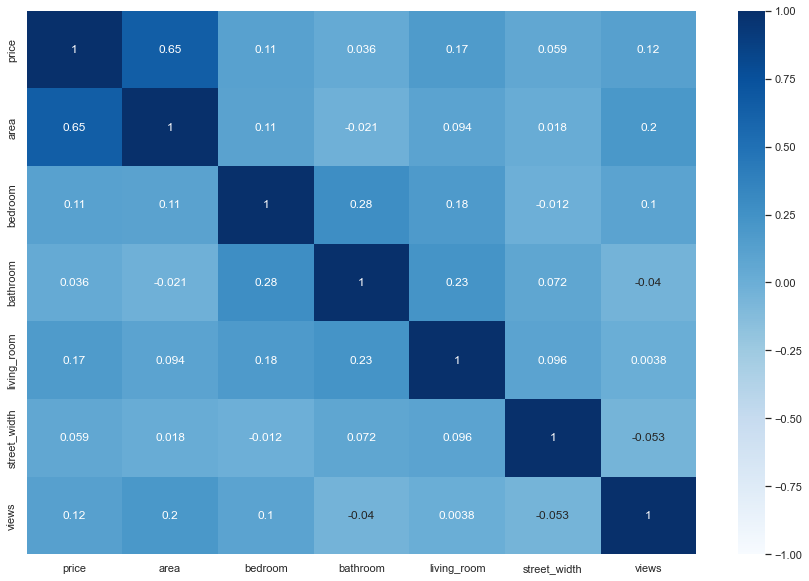

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues', annot=True, vmin=-1, vmax=1)
plt.savefig('aqar_corr.png', transparent=True, bbox_inches='tight', c = 'w');

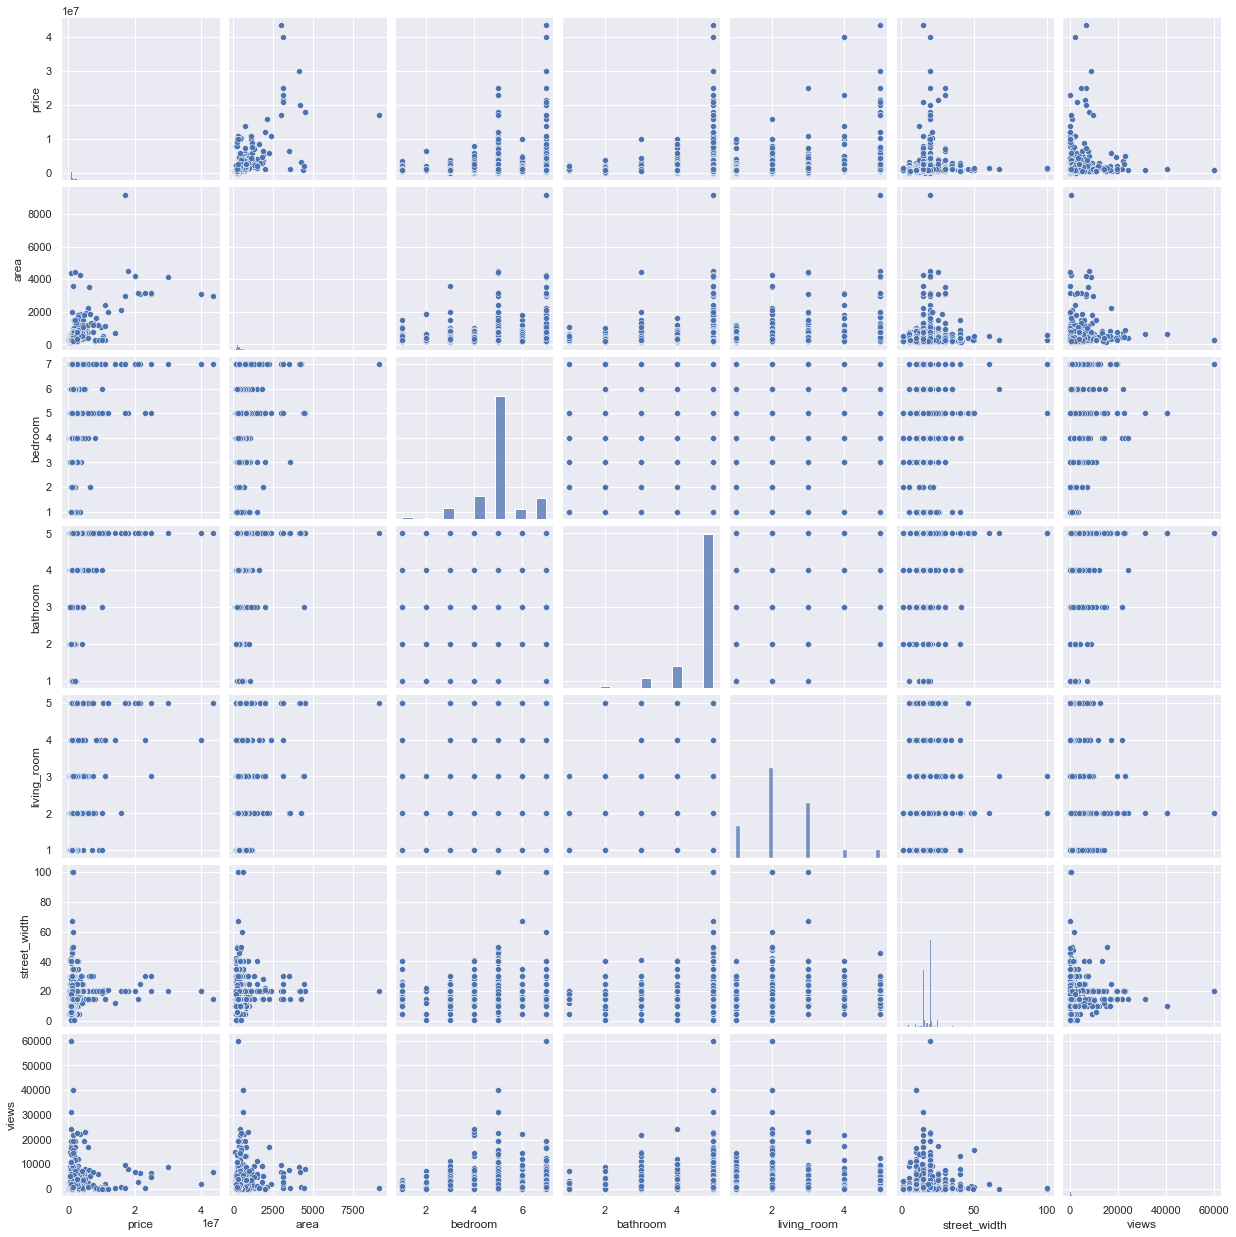

In [22]:
sns.pairplot(df, plot_kws=dict());

In [23]:
#remove outliers
#1
# maximum and minimum price
df = df[df['price']<4000000]
df = df[df['price']>800000]
#2
# minimum area
df = df.loc[df['area'] <= 1200,:]
#3
# minimum street width 
df = df.loc[df['street_width'] <= 35,:]


In [24]:
# the shape after dropping the duplicate
df.shape

(6985, 9)

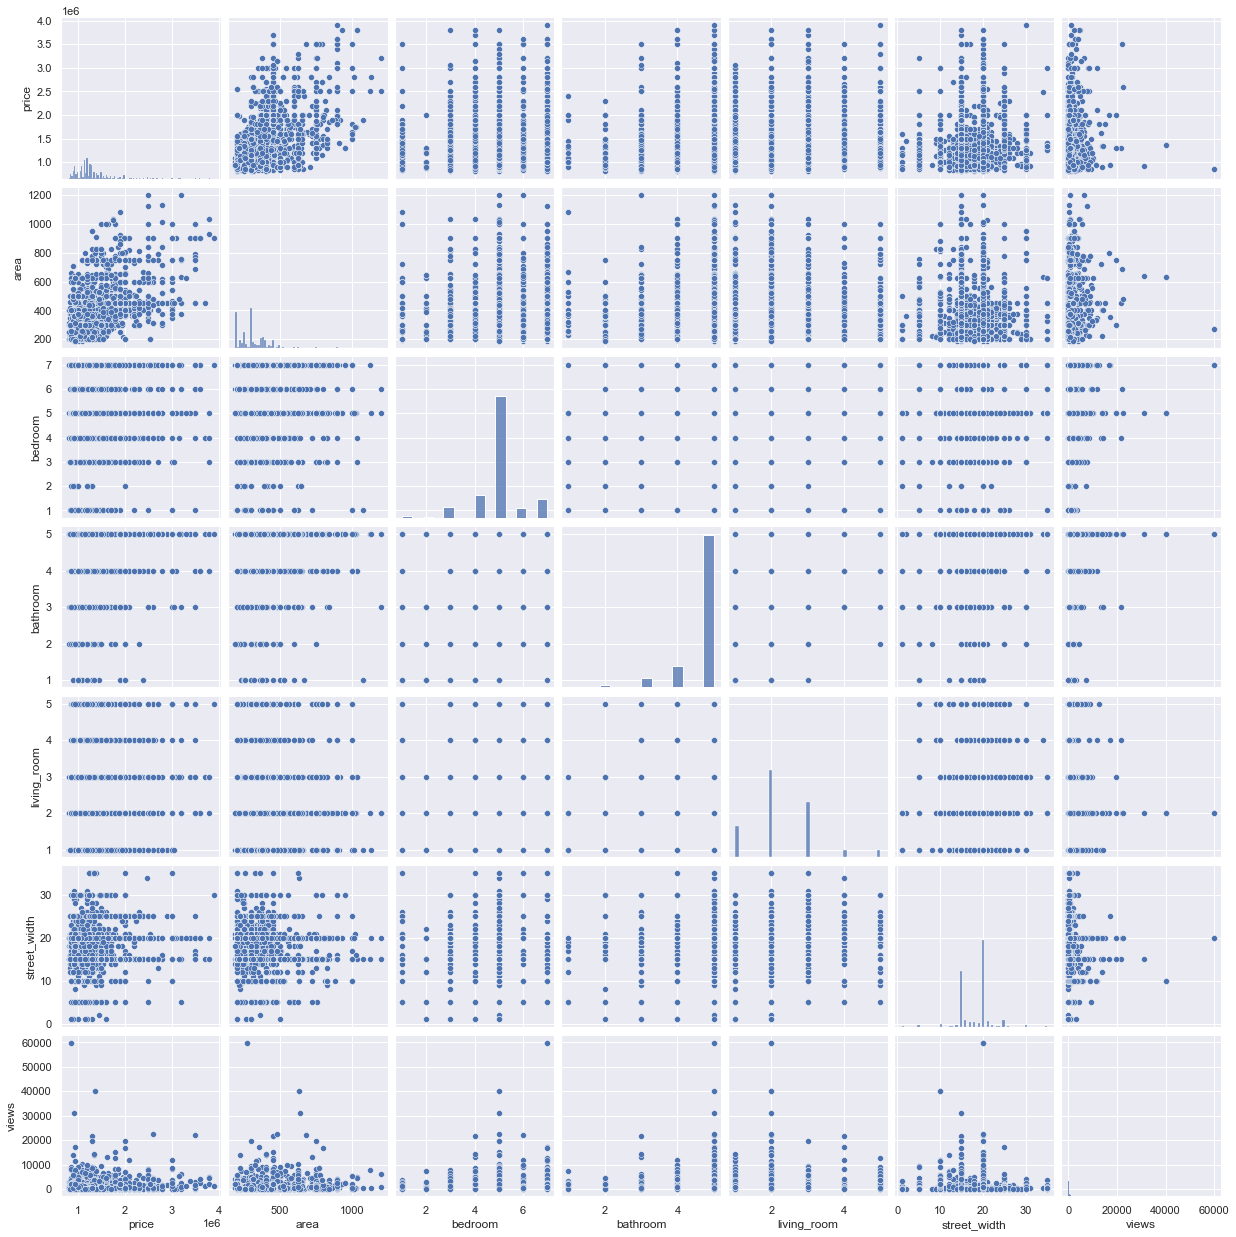

In [25]:
sns.pairplot(df)

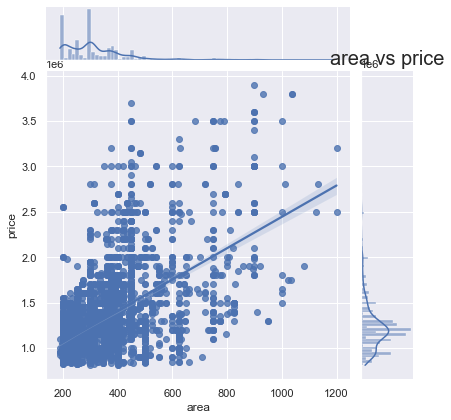

In [26]:
# here plotting the changing an area given prices.
sns.jointplot(x='area', y='price', data = df, kind = 'reg')
plt.title( 'area vs price',fontsize =20);

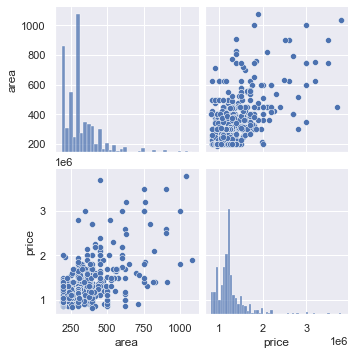

In [27]:
sns.pairplot(df[['area','price']][:1000]);

In [28]:
#change categorical data to dummy 
df= pd.concat([df.drop('direction', axis=1), pd.get_dummies(df['direction'],drop_first=True)], axis=1)

In [29]:
# rename the arabic column to english names.  
df.rename(columns={'4 شوارع':'four_street','3 شوارع':'three_street','جنوب':'south','جنوب شرقي':'south_east',
                   'جنوب غربي':'south_west','شرق':'east','شمال':'north','شمال شرقي':'north_east',
                   'شمال غربي':'north_west','غرب':'west'}, inplace=True)

In [30]:
#change categorical data to dummy 
df2 = pd.get_dummies(df, columns =['bedroom','bathroom','living_room'], drop_first=True)


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6985 entries, 0 to 7386
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6985 non-null   float64
 1   area             6985 non-null   float64
 2   street_width     6985 non-null   float64
 3   house_age        6985 non-null   object 
 4   views            6985 non-null   float64
 5   south            6985 non-null   uint8  
 6   south_east       6985 non-null   uint8  
 7   south_west       6985 non-null   uint8  
 8   east             6985 non-null   uint8  
 9   north            6985 non-null   uint8  
 10  north_east       6985 non-null   uint8  
 11  north_west       6985 non-null   uint8  
 12  west             6985 non-null   uint8  
 13  bedroom_2.0      6985 non-null   uint8  
 14  bedroom_3.0      6985 non-null   uint8  
 15  bedroom_4.0      6985 non-null   uint8  
 16  bedroom_5.0      6985 non-null   uint8  
 17  bedroom_6.0   

In [32]:
df2.corr()

,price,area,street_width,views,south,south_east,south_west,east,north,north_east,...,bedroom_6.0,bedroom_7.0,bathroom_2.0,bathroom_3.0,bathroom_4.0,bathroom_5.0,living_room_2.0,living_room_3.0,living_room_4.0,living_room_5.0
price,1.000000,0.584186,0.090969,0.109595,-0.022349,0.078694,0.067096,-0.035727,-0.048539,0.022984,...,0.072580,0.176592,-0.015406,-0.027103,-0.000867,0.018537,-0.083516,0.008727,0.114306,0.124262
area,0.584186,1.000000,-0.068134,0.207900,-0.023061,0.082893,0.084979,-0.052055,-0.049427,0.041463,...,0.001689,0.214279,0.004842,0.029133,0.069740,-0.081971,-0.039889,-0.119842,0.083532,0.084950
street_width,0.090969,-0.068134,1.000000,-0.061687,0.000667,0.008430,0.005101,0.022380,-0.003497,0.019466,...,-0.012361,-0.064400,-0.013521,-0.059839,-0.041989,0.079228,-0.036929,0.100484,0.011843,0.029657
views,0.109595,0.207900,-0.061687,1.000000,0.019152,0.035918,0.044301,0.005811,-0.037525,0.010655,...,0.026760,0.133622,-0.002237,0.013920,0.022958,-0.028861,0.018554,-0.050551,0.012981,0.037144
south,-0.022349,-0.023061,0.000667,0.019152,1.000000,-0.086466,-0.080585,-0.274078,-0.297223,-0.106241,...,0.003282,0.009782,-0.017935,-0.006800,0.003267,0.005971,0.000047,0.017344,0.004165,0.001996
south_east,0.078694,0.082893,0.008430,0.035918,-0.086466,1.000000,-0.027896,-0.094879,-0.102891,-0.036778,...,0.016160,0.033948,-0.011901,0.010920,-0.003799,0.001563,0.013046,-0.031576,-0.016909,0.026308
south_west,0.067096,0.084979,0.005101,0.044301,-0.080585,-0.027896,1.000000,-0.088425,-0.095892,-0.034276,...,0.022875,0.050306,0.006290,0.008780,0.004494,-0.009457,-0.011468,-0.018428,0.010337,0.008165
east,-0.035727,-0.052055,0.022380,0.005811,-0.274078,-0.094879,-0.088425,1.000000,-0.326141,-0.116578,...,0.006750,-0.023735,0.001990,0.013749,-0.015257,0.001780,-0.004587,0.017480,-0.005639,-0.005123
north,-0.048539,-0.049427,-0.003497,-0.037525,-0.297223,-0.102891,-0.095892,-0.326141,1.000000,-0.126422,...,-0.046080,-0.051320,0.017553,-0.005530,-0.008758,0.009305,-0.029634,0.007512,0.001215,-0.012838
north_east,0.022984,0.041463,0.019466,0.010655,-0.106241,-0.036778,-0.034276,-0.116578,-0.126422,1.000000,...,0.006295,0.043812,-0.005079,-0.016676,-0.015087,0.021228,0.014980,-0.012514,-0.002306,0.012092


In [33]:
df2.corr()['price'].sort_values(ascending = False)

price              1.000000
area               0.584186
bedroom_7.0        0.176592
living_room_5.0    0.124262
living_room_4.0    0.114306
views              0.109595
street_width       0.090969
south_east         0.078694
bedroom_6.0        0.072580
south_west         0.067096
north_west         0.046681
bedroom_4.0        0.029942
north_east         0.022984
west               0.020189
bathroom_5.0       0.018537
living_room_3.0    0.008727
bedroom_3.0        0.003045
bathroom_4.0      -0.000867
bedroom_2.0       -0.012740
bathroom_2.0      -0.015406
south             -0.022349
bathroom_3.0      -0.027103
east              -0.035727
north             -0.048539
living_room_2.0   -0.083516
bedroom_5.0       -0.171394
Name: price, dtype: float64

/var/folders/cq/s_bs9nmn2y12ltcwydm78mpr0000gn/T/ipykernel_97832/3129498549.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "c" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('aqar_corr_1.png', transparent=True, bbox_inches='tight', c = 'w');


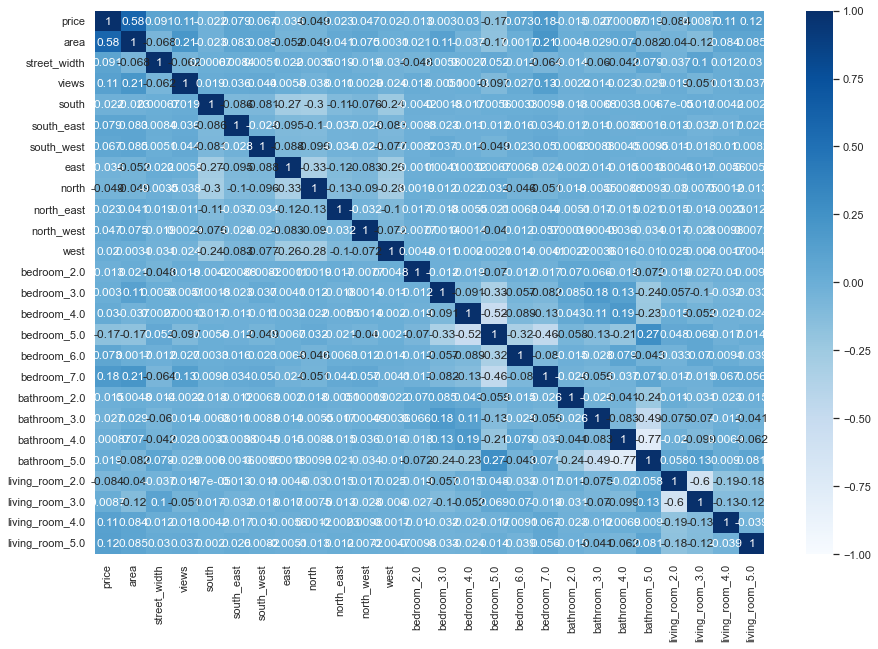

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),cmap='Blues', annot=True, vmin=-1, vmax=1)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('aqar_corr_1.png', transparent=True, bbox_inches='tight', c = 'w');
plt.show()

In [35]:
# convert all DataFrame columns to the float dtype
df2= df2.astype(float)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6985 entries, 0 to 7386
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6985 non-null   float64
 1   area             6985 non-null   float64
 2   street_width     6985 non-null   float64
 3   house_age        6985 non-null   float64
 4   views            6985 non-null   float64
 5   south            6985 non-null   float64
 6   south_east       6985 non-null   float64
 7   south_west       6985 non-null   float64
 8   east             6985 non-null   float64
 9   north            6985 non-null   float64
 10  north_east       6985 non-null   float64
 11  north_west       6985 non-null   float64
 12  west             6985 non-null   float64
 13  bedroom_2.0      6985 non-null   float64
 14  bedroom_3.0      6985 non-null   float64
 15  bedroom_4.0      6985 non-null   float64
 16  bedroom_5.0      6985 non-null   float64
 17  bedroom_6.0   

# 

# Modeling

------

- ### **simple stats model**

In [37]:
# create copy dataframe
df3=df2.copy()

In [38]:
X,y = df3.iloc[:,1:],df3['price']

In [39]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              6713.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        16:48:49   Log-Likelihood:                         -96983.
No. Observations:                6985   AIC:                                  1.940e+05
Df Residuals:                    6959   BIC:                                  1.942e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area             2310.1910     30.428     75.922      0.000    2250.542    2369.840
street_width     8298.8003    887.929      9.346      0.000    6558.189       1e+04
house_age       -2.191e+04    577.438    -37.936      0.000    -2.3e+04   -2.08e+04
views              10.0616      1.844      5.455      0.000       6.446      13.677
south            3.032e+05   5.22e+04      5.810      0.000    2.01e+05    4.06e+05
south_east       4.033e+05    5.5e+04      7.337      0.000    2.96e+05    5.11e+05
south_west       3.915e+05   5.56e+04      7.045      0.000    2.83e+05       5e+05
east             3.007e+05   5.21e+04      5.776      0.000    1.99e+05    4.03e+05
north            3.038e+05   5.22e+04      5.823      0.000    2.02e+05    4.06e+05
north_east       3.432e+05   5.38e+04      6.379      0.000    2.38e+05    4.49e+05
north_west       3.293e+05   5.55e+04      5.934      0.000    2.21e+05    4.38e+05
west             3.158e+05   5.23e+04      6.040      0.000    2.13e+05    4.18e+05
bedroom_2.0         -6e+04   6.89e+04     -0.871      0.384   -1.95e+05     7.5e+04
bedroom_3.0     -9.005e+04   3.48e+04     -2.588      0.010   -1.58e+05   -2.18e+04
bedroom_4.0      4.517e+04   3.32e+04      1.361      0.173   -1.99e+04     1.1e+05
bedroom_5.0     -3.338e+04   3.23e+04     -1.034      0.301   -9.67e+04    2.99e+04
bedroom_6.0      1.296e+05   3.47e+04      3.729      0.000    6.15e+04    1.98e+05
bedroom_7.0       9.19e+04   3.37e+04      2.729      0.006    2.59e+04    1.58e+05
bathroom_2.0     6.516e+04   5.79e+04      1.125      0.261   -4.84e+04    1.79e+05
bathroom_3.0     5.949e+04   5.25e+04      1.133      0.257   -4.35e+04    1.62e+05
bathroom_4.0      5.27e+04   5.21e+04      1.013      0.311   -4.93e+04    1.55e+05
bathroom_5.0     8.065e+04   5.17e+04      1.561      0.119   -2.06e+04    1.82e+05
living_room_2.0  4.609e+04   9407.327      4.899      0.000    2.76e+04    6.45e+04
living_room_3.0  8.743e+04   1.03e+04      8.523      0.000    6.73e+04    1.08e+05
living_room_4.0  1.429e+05   1.79e+04      7.973      0.000    1.08e+05    1.78e+05
living_room_5.0  1.468e+05   1.86e+04      7.880      0.000     1.1e+05    1.83e+05
==============================================================================
Omnibus:                     2551.209   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20260.317
Skew:                           1.534   Prob(JB):                         0.00
Kurtosis:                      10.759   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

## Splitting the data

In [40]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(df3.iloc[:,1:],df3['price'], test_size=0.05, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.047, random_state=40)

- ### **Linear Regression**

In [41]:
# Fit a simple linear regression on training set
lr = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [42]:
# Score on train and validation set
lr.fit(X_train,y_train)
print('Linear Regression train R^2:' ,lr.score(X_train, y_train))
print('Linear Regression val R^2:',lr.score(X_val, y_val))

Linear Regression train R^2: 0.49894064445002173
Linear Regression val R^2: 0.5553781647744509


In [43]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.49894064445002173
Val score 0.5553781647744509


- **Polynomial Regression with 2nd degree**

In [45]:
for degree in [1,2,3]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 0.49894064445002173
Val score 0.5553781647744516
--------------------
Degree 2
Train score 0.5820912021356749
Val score -25.39623837630432
--------------------
Degree 3
Train score 0.7088664455151201
Val score -5.30473521015609


- **Lasso**

In [46]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.4989402715537954
Val score 0.5553876037417567


/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90755941273484.12, tolerance: 83302398168.51022
  model = cd_fast.enet_coordinate_descent(


- **Ridge**

In [47]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.49888446136493236
Val score 0.5555924438328815


- **Random Forest**

In [48]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.950158191737679
Val score 0.6880678738536654


In [49]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

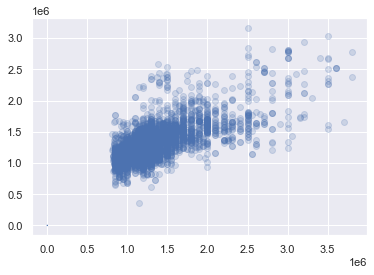

In [50]:
y_train_pred = lr_reg.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 500], [0, 500])

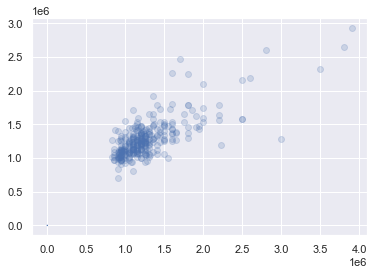

In [51]:
y_vall_pred = lr_reg.predict(X_val)
plt.scatter(y_val, y_vall_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

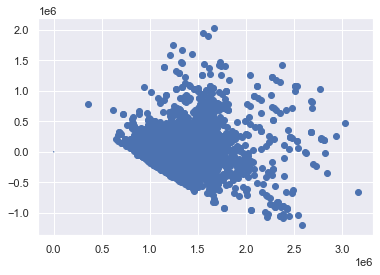

In [52]:
lin_reg = y_train - y_train_pred
plt.scatter(y_train_pred, lin_reg)
plt.plot([0,500],[0,500])

### LassoCV

In [53]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.5820912021356749

In [54]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

-25.39623837630432

In [55]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)


X_val_poly_scaled = scaler.transform(X_val_poly)


lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.5573548369425205

In [56]:
lasso.score(X_val_poly_scaled, y_val)

0.6111180607450993

In [57]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

0.42449404898598586

In [60]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Elastic Net Grid Search


/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163631763073651.5, tolerance: 67439357506.10778
  model = cd_fast.enet_coordinate_descent(
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167234189906332.84, tolerance: 65455339590.52296
  model = cd_fast.enet_coordinate_descent(
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162247480465098.1, tolerance: 66213920984.65403
  model = cd_fast.enet_coordinate_descent(
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

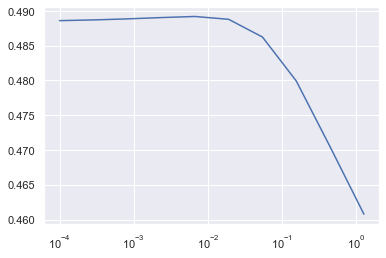

In [61]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10));

In [62]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred = elastic_net_grid_est.predict(X_val)
print("ElasticNet Regression:", r2_score(y_val, y_pred))

ElasticNet Regression: 0.5566195862259422


### Test Score:

In [63]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

rf = RandomForestRegressor()
rf.fit(X_train_val,y_train_val)

print(f'Train score {rf.score(X_train_val, y_train_val)}')
print(f'Test score {rf.score(X_test, y_test)}')

Train score 0.9505531265565482
Test score 0.656720111267854


In [64]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

lr = LinearRegression()
lr.fit(X_train_val,y_train_val)

print(f'Train score {lr.score(X_train_val, y_train_val)}')
print(f'Test score {lr.score(X_test, y_test)}')

Train score 0.5025986546189156
Test score 0.4411210365839835


In [65]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

ridge_model = Ridge()
ridge_model.fit(X_train_val,y_train_val)

print(f'Train score {ridge_model.score(X_train_val, y_train_val)}')
print(f'Test score {ridge_model.score(X_test, y_test)}')

Train score 0.5025470050575138
Test score 0.4413021195602713


In [66]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

lasso_model = Lasso()
lasso_model.fit(X_train_val,y_train_val)

print(f'Train score {lasso_model.score(X_train_val, y_train_val)}')
print(f'Test score {lasso_model.score(X_test, y_test)}')

Train score 0.5025982511670664
Test score 0.4411328617194574


/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107598050597133.23, tolerance: 88613908481.6049
  model = cd_fast.enet_coordinate_descent(


In [67]:
y_train_val_pred = lr.predict(X_train_val)
y_test_pred = lr.predict(X_test)

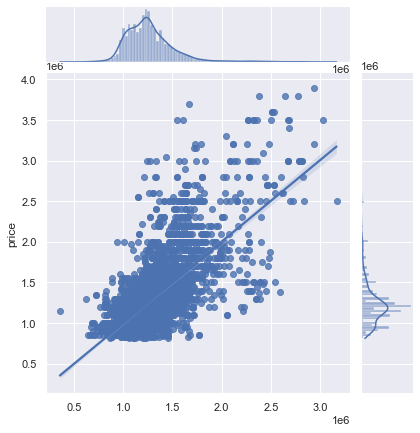

In [68]:
a=LinearRegression()
a.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90755941273484.12, tolerance: 83302398168.51022
  model = cd_fast.enet_coordinate_descent(


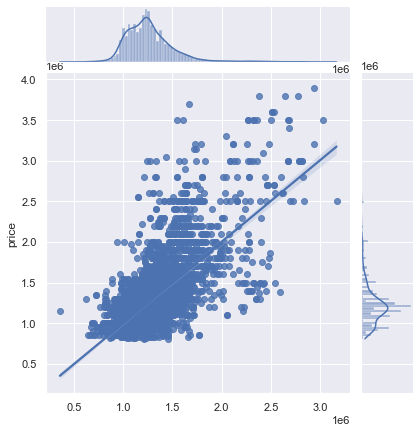

In [69]:
a2=Lasso()
a2.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')

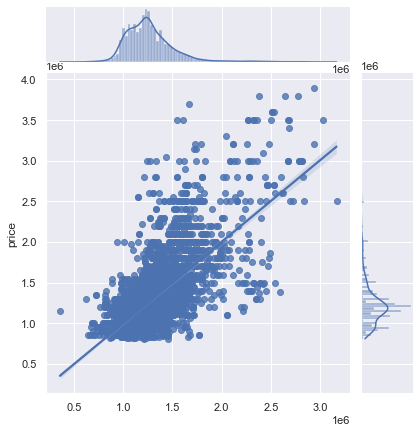

In [70]:
a1=Ridge()
a1.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')